## Fuji descent issue

### Reading the dataset

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray

csv_path = "mtfuji_data.csv"
data = pd.read_csv(csv_path)

print(data.head())


   x        lat         lng  elevation  distance
0  0  35.134141  139.132082        0.0         0
1  1  35.135826  139.129202        0.0       322
2  2  35.137510  139.126322        0.0       644
3  3  35.139194  139.123441        0.0       966
4  4  35.140878  139.120560        0.0      1288


### Problem 1: Data visualization

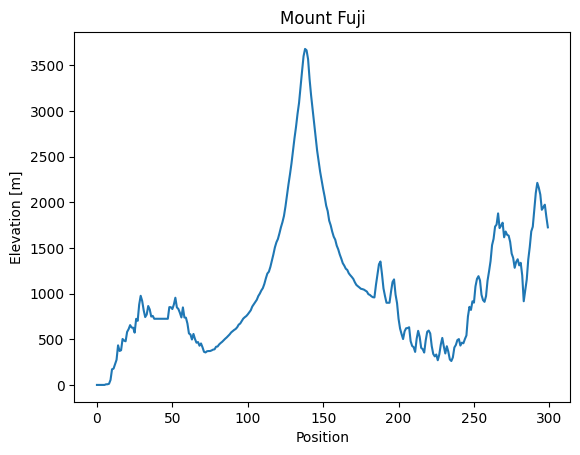

In [293]:
fuji_elevation = data['elevation']

plt.title("Mount Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation [m]")
plt.plot(fuji_elevation)
plt.show()

### Problem 2: Create a function to calculate the gradient at a certain point

In [294]:
def compute_gradient_at(_point: int):
    try:
        _change_in_y = fuji_elevation[_point+1] - fuji_elevation[_point]
        _change_in_x = (_point + 1) - _point
        _gradient = _change_in_y / _change_in_x
        return _gradient    
    except KeyError: return None # Elevation data does not include _point



### Problem 3: Create a function to calculate the destination point

In [295]:
def compute_destination(_point: int, _alpha: float = 0.2) -> int:
    if _alpha <= 0: return None
    _gradient = compute_gradient_at(_point)
    _destination = np.rint(_point - _alpha * _gradient)
    
    try: fuji_elevation[_destination]
    except KeyError: return None
    else: return _destination
    

### Problem 4: Create a function to go down the mountain

In [296]:
def descend_mountain(_current_location: int = 136) -> ndarray:
    """
    Goes down the mountain starting from the 136th location
    :return: 
    _visited_locations: ndarray
        1d array of positions visited during the descent process
    _visited_elevations: ndarray
        1d array of the elevations of each of the visited positions            
    """
    _visited_locations = np.array([_current_location])
    _visited_elevations = np.array([fuji_elevation[_current_location]])
    _next_location = compute_destination(_current_location)
    while _next_location is not None and _next_location != _visited_locations[-1]:
        _visited_locations = np.append(_visited_locations, _next_location)
        _visited_elevations = np.append(_visited_elevations, fuji_elevation[_next_location])
        _current_location = _next_location
        _next_location = compute_destination(_current_location)
    return _visited_locations, _visited_elevations

print(descend_mountain()[0])
print(descend_mountain()[1])

[136. 103.  98.  95.  89.  86.  83.  80.  76.  74.]
[3434.59  858.62  741.17  672.36  575.07  519.54  471.82  420.6   377.62
  371.04]


### Problem 5: Visualization of the descent process

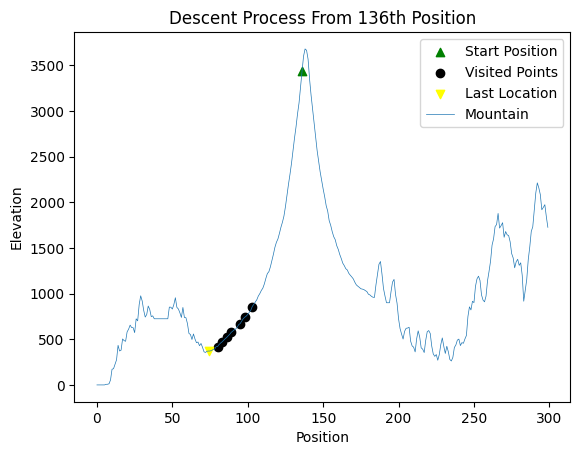

In [297]:
positions, elevations = descend_mountain()
plt.title("Descent Process From 136th Position")
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.scatter(positions[0], elevations[0], color='green', marker='^') #First Location X Elevation 
plt.scatter(positions[1:-2], elevations[1:-2], color='black') # Location X Elevation 
plt.scatter(positions[-1], elevations[-1], color='yellow', marker='v') #Last Location X Elevation 
plt.plot(fuji_elevation, linewidth=0.5)
plt.legend(["Start Position", "Visited Points", "Last Location", "Mountain"])
plt.show()

### Problem 6: Change of initial value

In [ ]:
initial_value_1 = np.argmax(fuji_elevation)
initial_value_2 = np.argmax(fuji_elevation[250:300])
initial_value_3 = np.argmax(fuji_elevation[0:100])

positions1, elevations1 = descend_mountain(initial_value_1)
positions2, elevations2 = descend_mountain(initial_value_2)
positions3, elevations3 = descend_mountain(initial_value_3)

### Problem 7: Visualization of the descent process for each initial value